# PLOTS
Zeus Elderfield

## Instructions:

You are given three datasets:

bar_assignment.csv
sankey_assignment.csv
networks_assignment.csv


General Instructions : Use the same font and font size for all graphs.
Instructions:

a. For Bar Graph:

Create a horizontal stacked bar chart
Transform 1 into “Yes” and 0 into “No”
Follow the plot specification for bar plot

b. For Sankey Diagram:

Create a Sankey Diagram that connects ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS') to the LABELS to ('Reg', 'Aca', 'Oth')
Follow the Path Specifications


C. Network Graph

Create the network graph
D,F,I,N,S should created as a pentagram located at the center of the graph showing connection with each other.
The others should be outside of the the pentagram, still showing connections to other nodes.
The node color should be:

Blue: [D,F,I,N,S], Green: ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’], Yellow: ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']


Finally you are required to collate the separate graph into one single graph for printing, the single graph should be visible when copy pasted in a long bond paper.

### Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kaleido
from IPython.display import Image
import networkx as nx

### Set Global variables

In [2]:
DATASET_PATH = './datasets/'
IMAGE_PATH = './img/'

### A. Bar Graph

In [3]:
bar_df = pd.read_csv(DATASET_PATH + 'bar_assignment.csv')

bar_df.tail()

,LABEL,COUNT
17,S,0
18,S,0
19,S,0
20,S,1
21,S,0


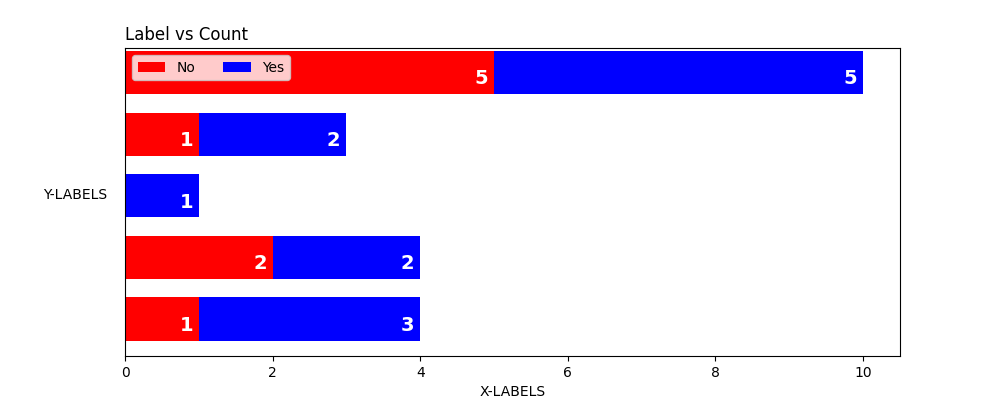

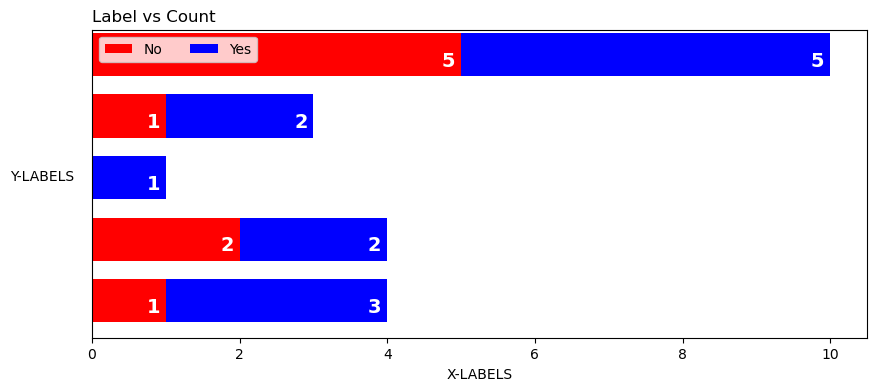

In [15]:
# Map count to convert 0 to No and 1 to Yes
bar_df['COUNT_YN'] = bar_df['COUNT'].map({
    0: 'No',
    1: 'Yes'
})

# Creates a crosstab of Label and Count_YN
crosstab = pd.crosstab(bar_df['LABEL'], bar_df['COUNT_YN'])

# Plot out into a horizontal bar
ax = crosstab.plot(
    kind='barh',
    stacked=True, 
    color=['red', 'blue'],
    figsize=(10, 4)
)

# Set label for each container
for container in ax.containers:
    ax.bar_label(
        container, 
        color='white', 
        padding=-14, 
        fontsize=14,
        fontweight=1000,
        labels=map(lambda x: str(int(x)), container.datavalues)
    )
    
# Adjust bar height
for bar in ax.patches:
    bar.set_height(0.7)
    
# Set graph title and label
plt.title("Label vs Count", loc='left')
plt.ylabel('Y-LABELS', rotation=0, labelpad=36)
plt.xlabel('X-LABELS')

# Remove y ticks
plt.yticks([])

# Add legend to top left
plt.legend(loc='upper left', ncols=2)

# Save image to IMAGE_PATH
# plt.savefig(IMAGE_PATH + 'bar_graph.png')
    
# Show plot
plt.show()

### B. Sankey Diagram

In [5]:
sankey_df = pd.read_csv(DATASET_PATH + 'sankey_assignment.csv')

sankey_df.tail()

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


In [43]:
def find_distance_sankey(mid, target):
    global sankey_df
    return sankey_df.loc[sankey_df['LABEL'] == mid, target].values[0]

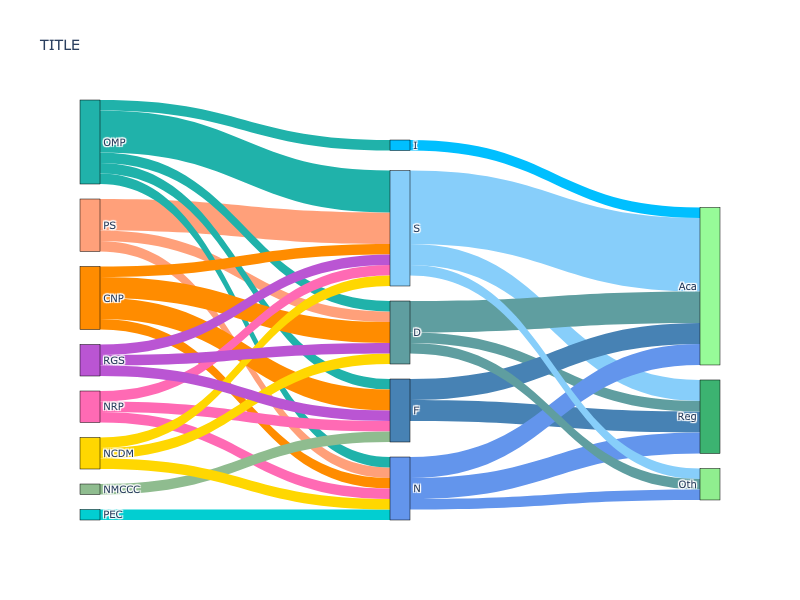

In [44]:
start = list(sankey_df.columns[1:9])
middle = list(sankey_df['LABEL'].unique())
end = list(sankey_df.columns[9:])

node_labels = start + middle + end

source = []
target = []
value = []

node_indices = {x: i for i, x in enumerate(node_labels)}

# Get values from start to middle
for s in start:
    for m in middle:
        dist = find_distance_sankey(m, s)
        
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)
            
# # Get values from middle to end
for e in end:
    for m in middle:
        dist = find_distance_sankey(m, e)
        
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)
            
colors = [
    '#FFA07A', # PS
    '#20B2AA', # OMP
    '#FF8C00', # CNP
    '#FF6AB4', # NRP
    '#8FBC8F', # NMCCC
    '#02CED1', # PEC
    '#FFD701', # NCDM
    '#BA55D3', # RGS
    '#87CEFA', # S
    '#4782B4', # F
    '#5F9EA0', # D
    '#6395EC', # N 
    '#00BFFF', # I
    '#3CB371', # Reg
    '#97FB98', # Aca
    '#90EE8F' # Oth
]

# Create Sankey Figure
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = colors
    ),
    link = dict(
        source = source,
        target = target, 
        value = value,
        color = [colors[s] for s in source]
  ))])

fig.update_layout(title_text="TITLE", font_size=10)

# Save image to IMAGE_PATH
# fig.write_image(IMAGE_PATH + "sankey_diagram.png", width=800, height=600) 

Image(IMAGE_PATH + "sankey_diagram.png")

# fig.show()

### C. Network Graph

In [7]:
networks_df = pd.read_csv(DATASET_PATH + 'networks_assignment.csv')

networks_df.tail()

,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,...,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,...,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,...,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,...,0,0,2,2,2,2,3,1,1,1


In [72]:
def find_distance_networks(source, target):
    global networks_df
    return networks_df.loc[networks_df['LABELS'] == source, target].values[0]

def find_edges(collection, source, target):
    for s in source:
        for t in target:
            dist = find_distance_networks(s, t)

            if dist > 0:
                collection.append((s, t))

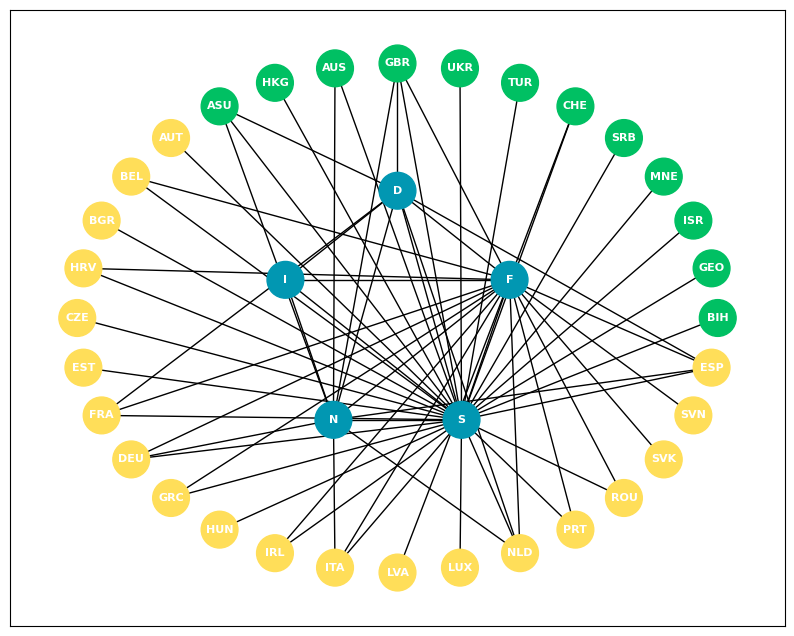

In [113]:
blue_nodes = ['D','F','I','N','S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

nodes = blue_nodes + green_nodes + yellow_nodes

bb_edges = []
bg_edges = []
by_edges = []

# Find Edges
find_edges(bb_edges, blue_nodes, blue_nodes)
find_edges(bg_edges, blue_nodes, green_nodes)
find_edges(by_edges, blue_nodes, yellow_nodes)

edges = bb_edges + bg_edges + by_edges

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.circular_layout(G.subgraph(green_nodes + yellow_nodes), center=(0, 0), scale=1.0)

pos.update({
    'D': np.array([0, 0.5]),
    'F': np.array([0.35, 0.15]),
    'I': np.array([-0.35, 0.15]),
    'N': np.array([-0.20, -0.4]),
    'S': np.array([0.20, -0.4])
})

color_set = [
    (node_set, color) for node_set, color in zip(
        map(set, [blue_nodes, green_nodes, yellow_nodes]), 
        ['#0197B2', '#00C063', '#FFDE59']
    )
]

colors = [
    color for (node_set, color) in color_set for node in nodes if node in node_set 
]

plt.figure(figsize=(10, 8))

# Draw graph
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=700)
nx.draw_networkx_labels(G, pos, font_weight='bold', font_size=8, font_color='white')
nx.draw_networkx_edges(G, pos, arrows=False, edge_color='black')

# Save image to IMAGE_PATH
# plt.savefig(IMAGE_PATH + 'network_graph.png')

plt.show()